In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


In [92]:
(data1_castelmassa['Level'])

0         5.91
1         5.91
2         5.91
3         5.91
4         5.91
          ... 
131496    4.88
131497    4.88
131498    4.88
131499    4.88
131500    4.88
Name: Level, Length: 129180, dtype: float64

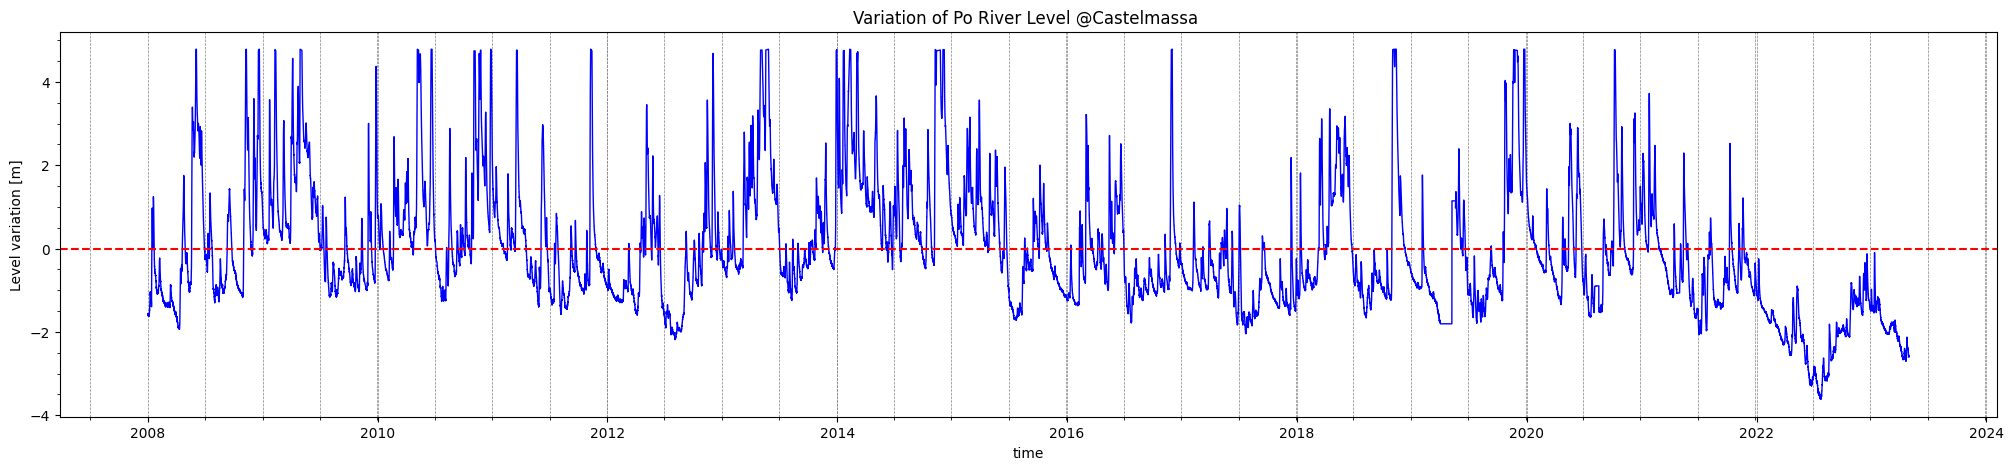

In [17]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [18]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

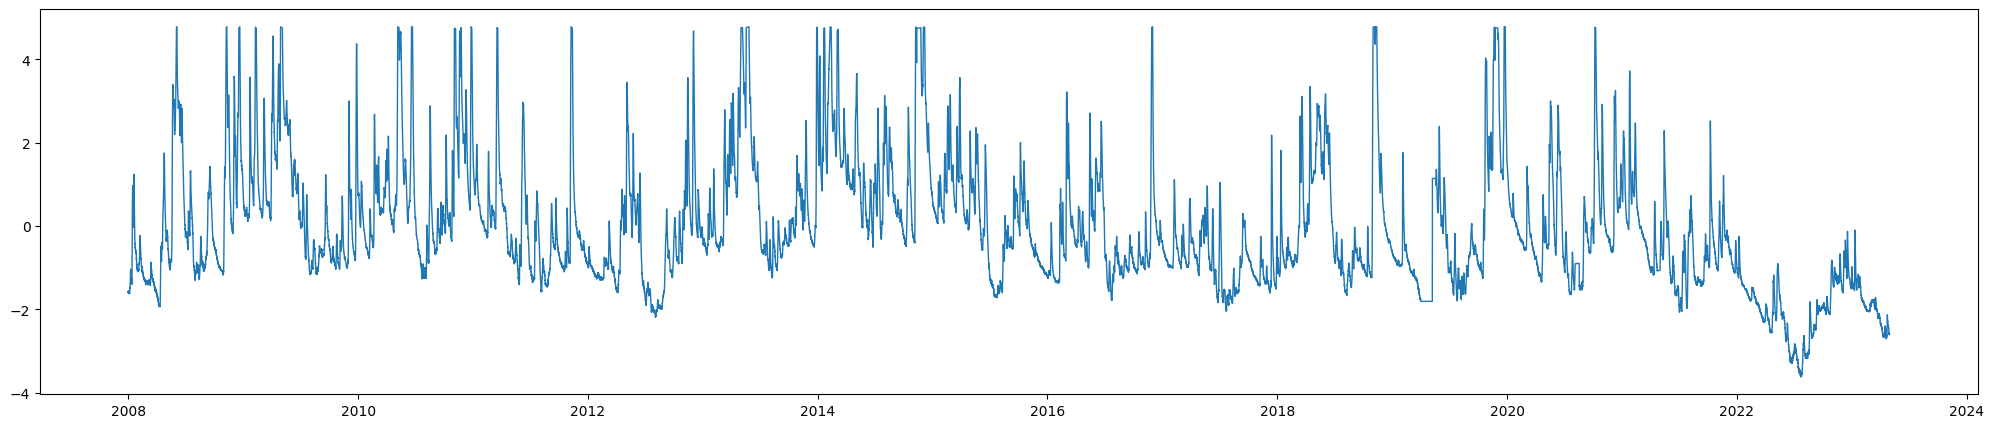

In [19]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [93]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Level'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [94]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1  6.798937 2008-01-01
1    2008     2  6.422248 2008-02-01
2    2008     3  6.139312 2008-03-01
3    2008     4  6.844403 2008-04-01
4    2008     5  8.146102 2008-05-01
..    ...   ...       ...        ...
179  2022    12  6.406492 2022-12-01
180  2023     1  6.187473 2023-01-01
181  2023     2  5.546935 2023-02-01
182  2023     3  5.526868 2023-03-01
183  2023     4  4.987097 2023-04-01

[184 rows x 4 columns]


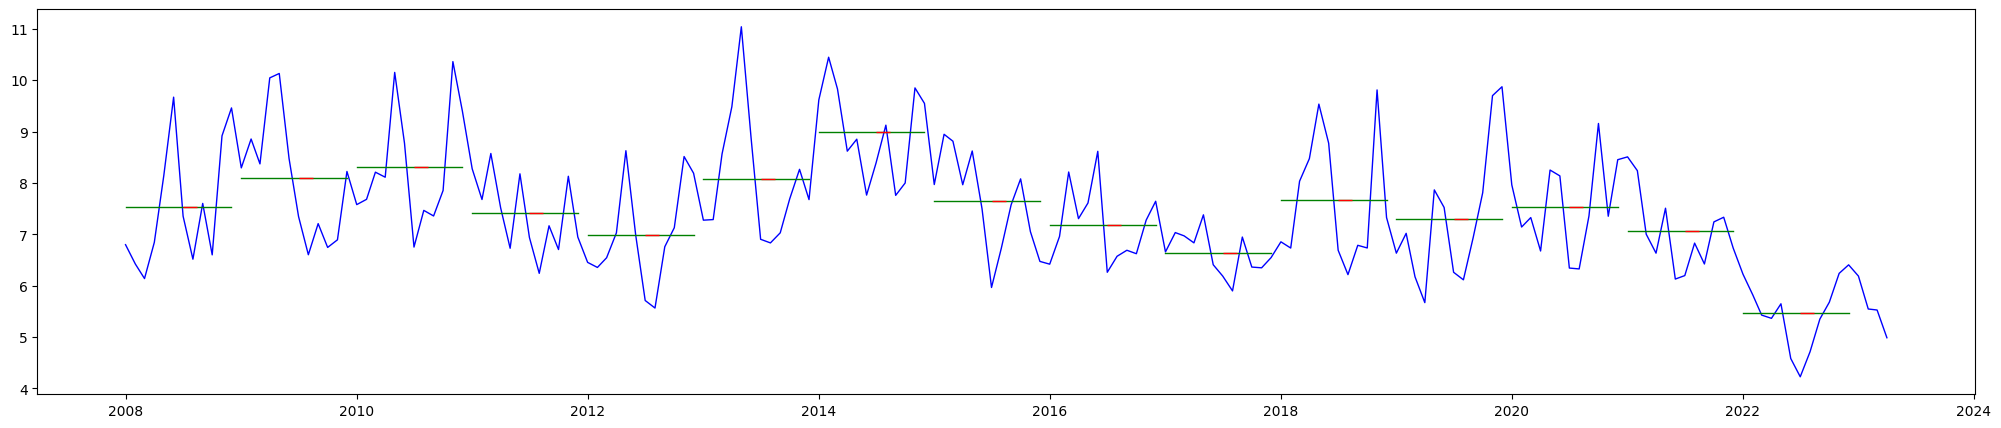

In [95]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i],np.ones(np.size(df['Average'][i-12:i]))*np.mean(df['Average'][i-12:i]),color='green', linewidth=1)

for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-6],np.mean(df['Average'][i-12:i]),color='red', marker=1, markersize=10)


C:\Users\lofer\miniconda3\envs\tools_env\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  8.25226794e+00
  1.00000000e+00 -7.63031098e-03]


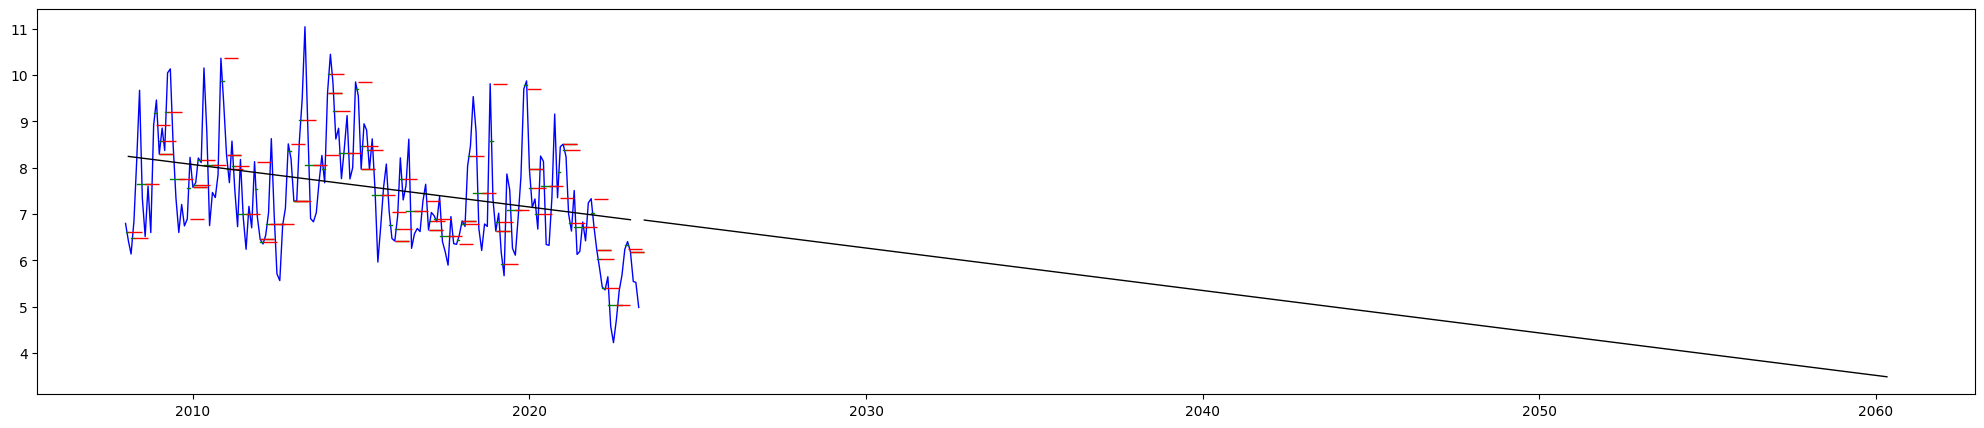

In [106]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Average'][i-12:i-10]))*np.mean(df['Average'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Average'][i-10:i-8]))*np.mean(df['Average'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Average'][i-8:i-2]))*np.mean(df['Average'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Average'][i-2:i]))*np.mean(df['Average'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Average'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Average'][i-12:i-10])) 
    y.append(np.mean(df['Average'][i-10:i-8])) 
    y.append(np.mean(df['Average'][i-8:i-2])) 
    y.append(np.mean(df['Average'][i-2:i-1])) 
    y.append(df['Average'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Average'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Average'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Average'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Average'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Average'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d, e, f):
    return (a*0 + e*x*0) * np.sin(b*x+c) + d +f*x

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d, e, f = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a*2, b, c, d, e, f) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a*2, b, c, d, e, f) ) 

plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


In [99]:
df['Date'][0], y_new[0], y_NEW[-1]

(Timestamp('2008-01-01 00:00:00'), 8.820335100141847, 2.703402829337353)

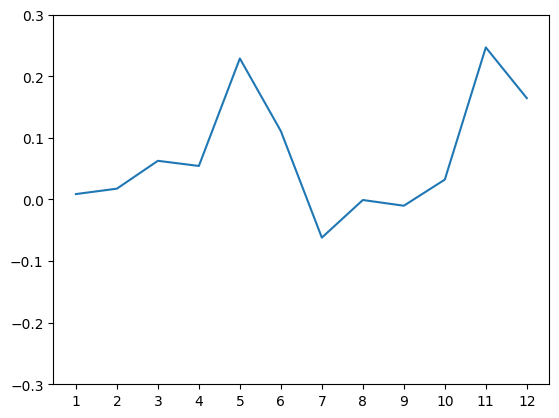

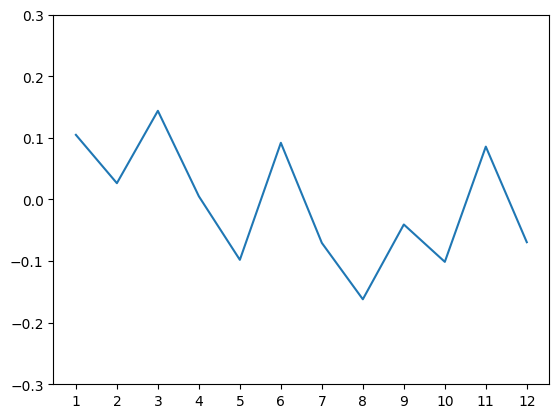

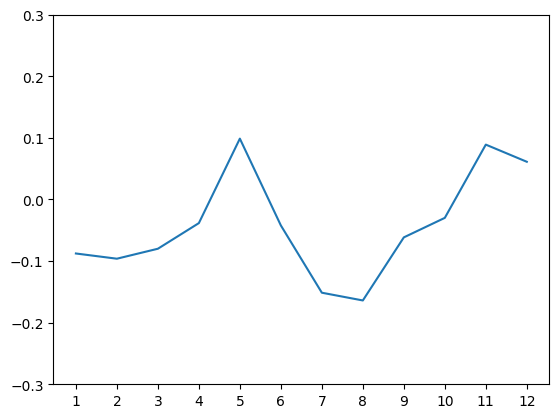

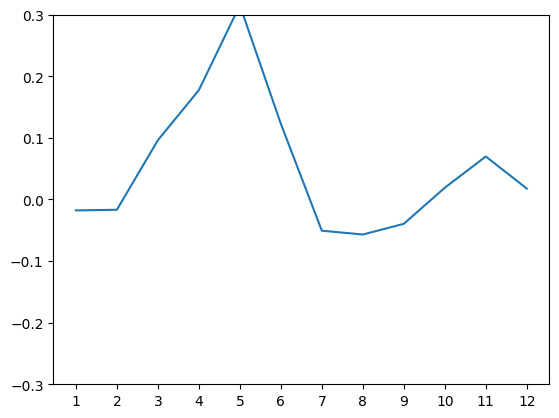

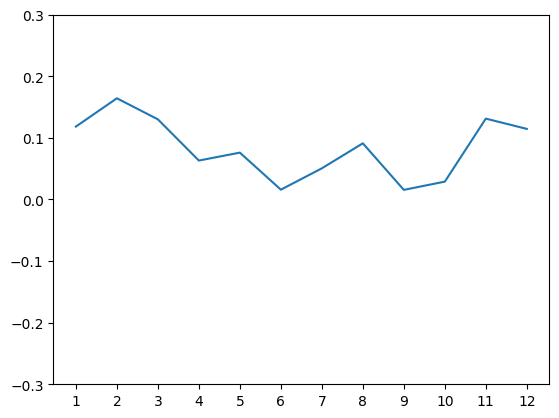

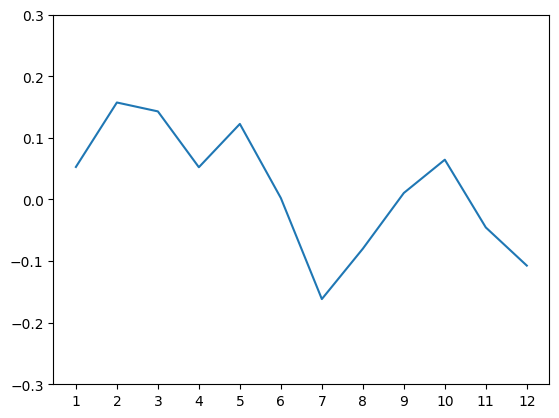

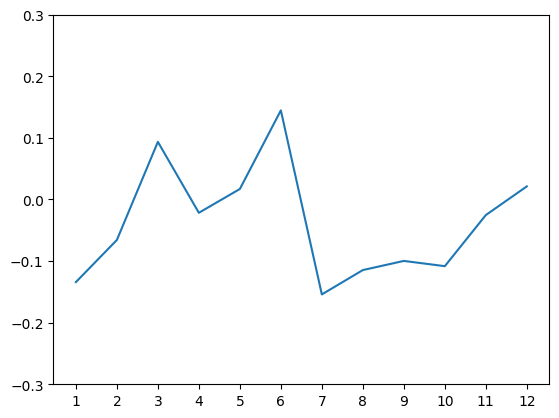

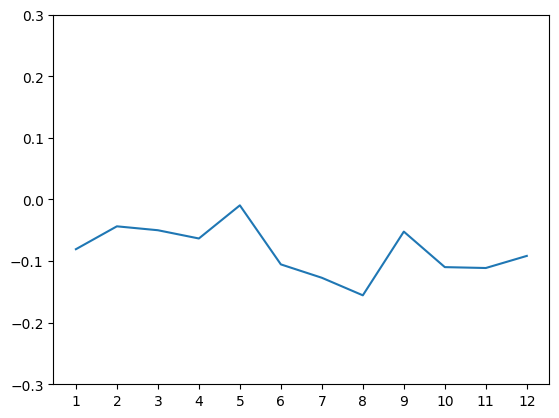

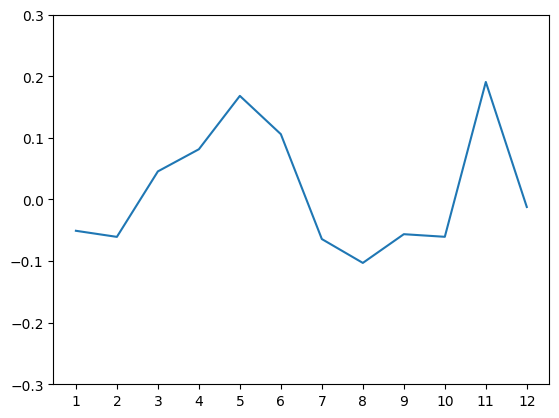

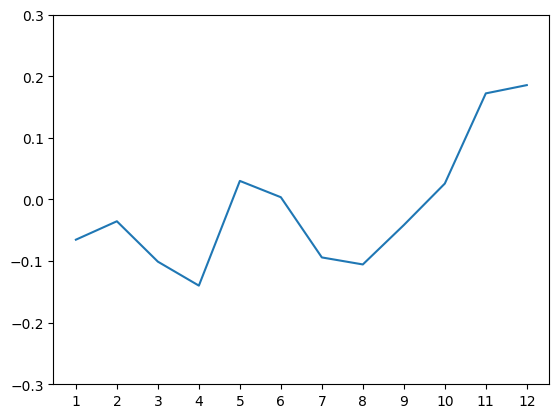

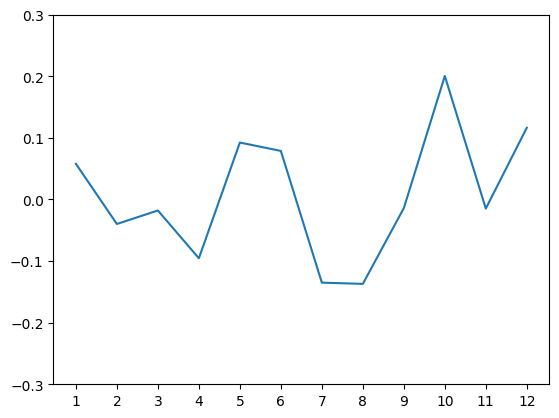

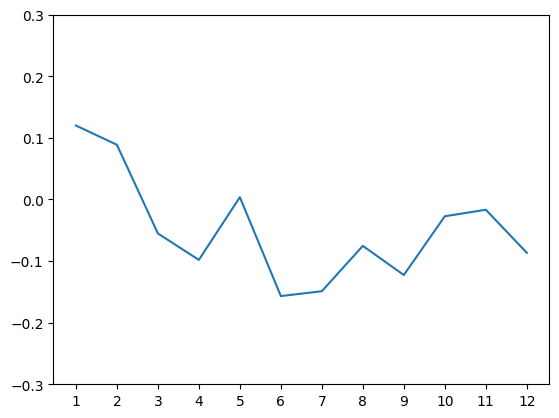

In [72]:
for i in range(2010, 2022):
    df2 = df[df['Date'].dt.year == i]
    plt.plot(df2['Month'], df2['Average'])
    plt.axhline(/np.sum(np.abs(df2['Average']))
    plt.ylim((-0.3, 0.3))
    plt.show()

In [102]:
# Funzione da minimizzare
def model(params, x):
    A, B, C, D, E, F, w1, w2, theta1,theta2 = params
#     return (A + B*x + F*x**2) * np.sin(w * x + theta) + C*x + D + E*x**2
    return A * np.sin(w1 * x + theta1) + C*x + D + B * np.sin(w2 * x + theta2)

In [103]:
# Funzione di errore
def error(params, x, y):
    return model(params, x) - y

In [104]:
from scipy.optimize import least_squares

# Dati di input
values = df['Average']  # Inserisci qui i tuoi valori giornalieri
x = np.arange(len(values))  # Creazione dell'array degli indici
y = np.array(values)  # Creazione dell'array dei valori giornalieri

# Parametri iniziali
params0 = np.ones(10)  # Valori iniziali per A, w e theta

# Ottimizzazione
result = least_squares(error, params0, args=(x, y))

print(result.x)

[-0.50210681 -0.2637889  -0.00903168  8.24855282 -7.13595736 -7.57695881
  4.18171427 -2.10725137  2.45419043  0.36397854]


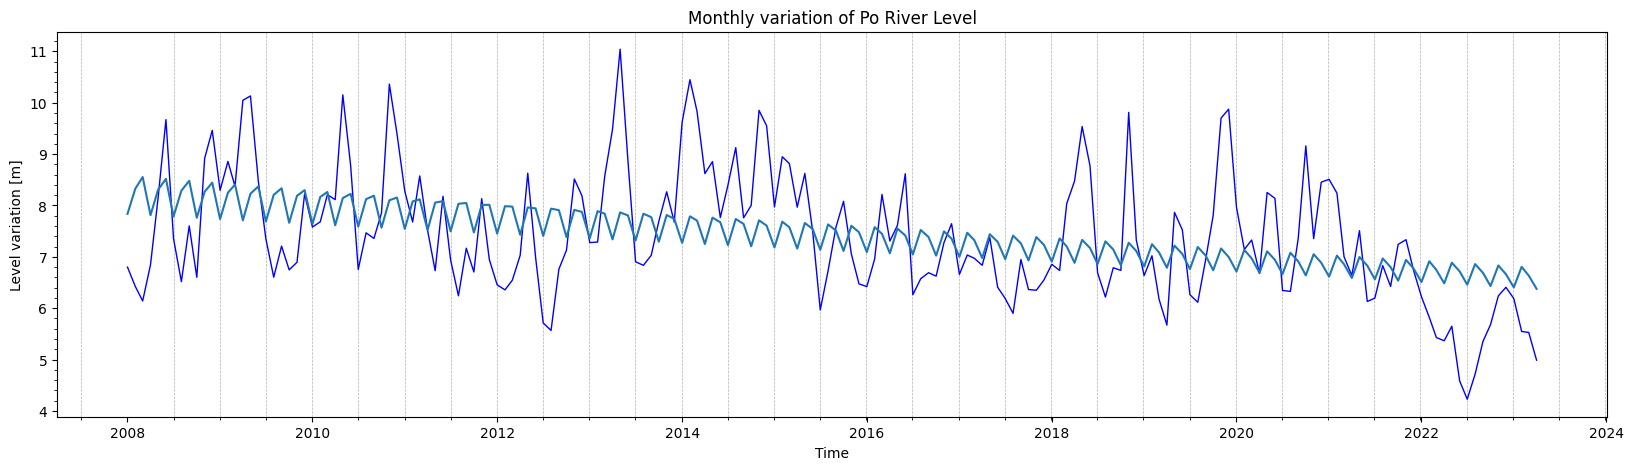

In [105]:
plt.subplots(figsize=(20, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
plt.title('Monthly variation of Po River Level')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

xx=list(range(len(df['Average'])))
sinfx=[]
for x in xx:
    #sinfx.append(-math.sin(math.pi*x/3)*sigma+mean-x*0.005)
    sinfx.append( model(result.x, x) )
plt.plot(df['Date'],sinfx)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)